# MNIST數字辨識模型


In [1]:
# 載入套件
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam

# MNIST數據集
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 資料預處理
# 將圖像數據轉化為4維張量，並進行minmax標準化
# x_train.shape[0]可以改寫為-1
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32') / 255
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32') / 255

# 將y轉為one-hot的向量
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [2]:
x_train[0]
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

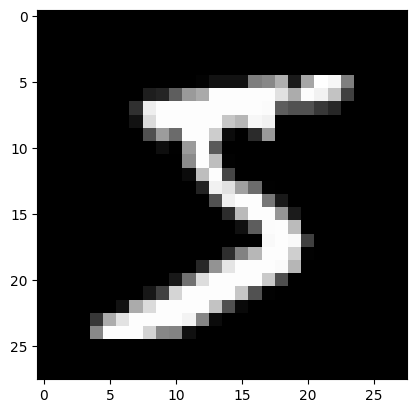

In [3]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0], cmap='gray')

In [4]:
# 建立模型
model = Sequential([
    # 第一個卷積層，32個3x3的過濾器，使用ReLU激活函數
    Conv2D(32, kernel_size=(3, 3), activation="relu"),
    # 最大池化層，2x2池化窗口
    MaxPooling2D(pool_size=(2, 2)),
    # 第二個卷積層，64個3x3的過濾器，使用ReLU激活函數
    Conv2D(64, kernel_size=(3, 3), activation="relu"),
    # 最大池化層，2x2池化窗口
    MaxPooling2D(pool_size=(2, 2)),
    # Dropout層，減少過擬合
    Dropout(0.5),
    # 數據扁平化層，將3D特徵轉化為1D向量
    Flatten(),
    # 全連接層，64個神經元
    Dense(64, activation="relu"),
    # Dropout層，進一步減少過擬合
    Dropout(0.5),
    # 輸出層，10個神經元，對應10個類別，使用softmax函數
    Dense(10, activation="softmax")
])


In [5]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [6]:
history = model.fit(x_train, y_train, batch_size=128, epochs=15, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 18s 9ms/step - loss: 0.4682 - accuracy: 0.8502 - val_loss: 0.0707 - val_accuracy: 0.9802
Epoch 2/15
422/422 [==============================] - 3s 8ms/step - loss: 0.1674 - accuracy: 0.9500 - val_loss: 0.0489 - val_accuracy: 0.9863
Epoch 3/15
422/422 [==============================] - 3s 6ms/step - loss: 0.1289 - accuracy: 0.9621 - val_loss: 0.0461 - val_accuracy: 0.9867
Epoch 4/15
422/422 [==============================] - 2s 6ms/step - loss: 0.1128 - accuracy: 0.9667 - val_loss: 0.0381 - val_accuracy: 0.9887
Epoch 5/15
422/422 [==============================] - 2s 6ms/step - loss: 0.1037 - accuracy: 0.9704 - val_loss: 0.0381 - val_accuracy: 0.9883
Epoch 6/15
422/422 [==============================] - 2s 6ms/step - loss: 0.0894 - accuracy: 0.9740 - val_loss: 0.0346 - val_accuracy: 0.9898
Epoch 7/15
422/422 [==============================] - 3s 8ms/step - loss: 0.0828 - accuracy: 0.9757 - val_loss: 0.0345 - val_accuracy: 0.9902
Epoch

In [7]:
score = model.evaluate(x_test, y_test)
print("測試損失:", score[0])
print("測試準確度:", score[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.0216 - accuracy: 0.9930
測試損失: 0.021602114662528038
測試準確度: 0.9929999709129333


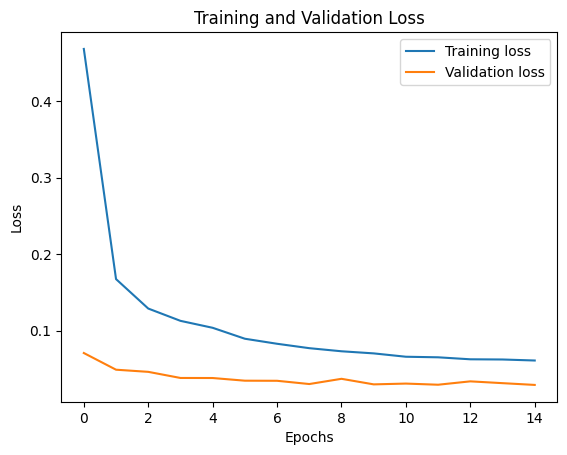

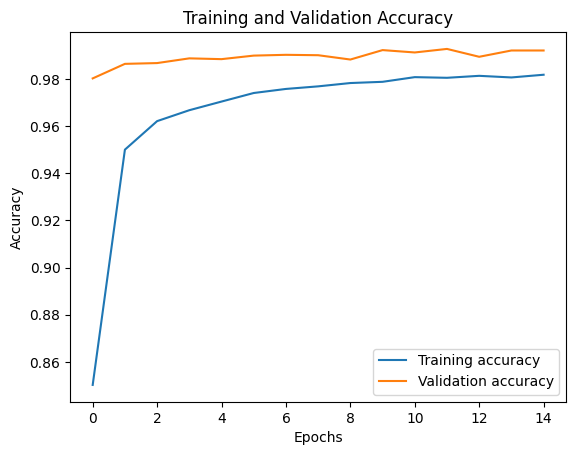

In [8]:
import matplotlib.pyplot as plt

# 損失曲線
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 準確率曲線
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 5, 5, 64)          0         
                                                                 
 flatten (Flatten)           (None, 1600)              0

## Pytorch版本

In [10]:
# 載入套件
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from torchvision import datasets, transforms

# 設定裝置
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# MNIST數據集載入及預處理
transform = transforms.Compose([
    transforms.ToTensor(),  # 將圖片轉換為Tensor
    transforms.Normalize((0.5,), (0.5,))  # 標準化
])

# 載入數據集
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# 切分訓練數據集為訓練和驗證集
train_size = int(0.9 * len(train_dataset))
validation_size = len(train_dataset) - train_size
train_dataset, validation_dataset = torch.utils.data.random_split(train_dataset, [train_size, validation_size])

# 載入數據加載器
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
validation_loader = DataLoader(validation_dataset, batch_size=128, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)

# 建立模型
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.relu1 = nn.ReLU()
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.relu2 = nn.ReLU()
        self.dropout1 = nn.Dropout(0.5)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(64 * 7 * 7, 64)
        self.relu3 = nn.ReLU()
        self.dropout2 = nn.Dropout(0.5)
        self.fc2 = nn.Linear(64, 10)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.relu1(self.conv1(x))
        x = self.pool(x)
        x = self.relu2(self.conv2(x))
        x = self.pool(x)
        x = self.dropout1(x)
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu3(x)
        x = self.dropout2(x)
        x = self.fc2(x)
        x = self.softmax(x)
        return x

model = CNN().to(device)

# 損失函數和優化器
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())

# 訓練模型
for epoch in range(15):
    model.train()
    for data, target in train_loader:
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()

    # 驗證模型
    model.eval()
    validation_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in validation_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            validation_loss += criterion(output, target).item()
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()

    validation_loss /= len(validation_loader.dataset)
    validation_accuracy = 100. * correct / len(validation_loader.dataset)
    print(f"Epoch {epoch+1}, Validation Loss: {validation_loss:.4f}, Validation Accuracy: {validation_accuracy:.2f}%")

# 測試模型
test_loss = 0
correct = 0
with torch.no_grad():
    for data, target in test_loader:
        data, target = data.to(device), target.to(device)
        output = model(data)
        test_loss += criterion(output, target).item()
        pred = output.argmax(dim=1, keepdim=True)
        correct += pred.eq(target.view_as(pred)).sum().item()

test_loss /= len(test_loader.dataset)
test_accuracy = 100. * correct / len(test_loader.dataset)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%")


Epoch 1, Validation Loss: 0.0118, Validation Accuracy: 96.27%
Epoch 2, Validation Loss: 0.0117, Validation Accuracy: 96.98%
Epoch 3, Validation Loss: 0.0117, Validation Accuracy: 97.30%
Epoch 4, Validation Loss: 0.0116, Validation Accuracy: 97.58%
Epoch 5, Validation Loss: 0.0116, Validation Accuracy: 97.63%
Epoch 6, Validation Loss: 0.0116, Validation Accuracy: 97.87%
Epoch 7, Validation Loss: 0.0116, Validation Accuracy: 98.12%
Epoch 8, Validation Loss: 0.0116, Validation Accuracy: 98.00%
Epoch 9, Validation Loss: 0.0116, Validation Accuracy: 98.12%
Epoch 10, Validation Loss: 0.0116, Validation Accuracy: 98.22%
Epoch 11, Validation Loss: 0.0116, Validation Accuracy: 98.35%
Epoch 12, Validation Loss: 0.0116, Validation Accuracy: 98.52%
Epoch 13, Validation Loss: 0.0116, Validation Accuracy: 98.52%
Epoch 14, Validation Loss: 0.0116, Validation Accuracy: 98.40%
Epoch 15, Validation Loss: 0.0116, Validation Accuracy: 98.30%
Test Loss: 0.0116, Test Accuracy: 98.65%


# 實戰 CIFAR-10 圖像分類
https://www.kaggle.com/c/cifar-10/

In [11]:
# 載入套件
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam

# CIFAR-10數據集
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# 資料預處理
x_train = x_train.reshape(-1, 32, 32, 3).astype('float32') / 255
x_test = x_test.reshape(-1, 32, 32, 3).astype('float32') / 255

# 將y轉為one-hot的向量
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

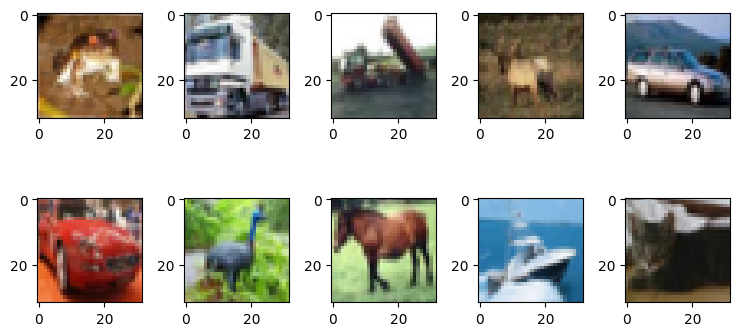

In [12]:
import matplotlib.pyplot as plt

# 設定圖片的列數和行數
num_row = 2
num_col = 5

# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(10):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(x_train[i], cmap='gray')
plt.tight_layout()
plt.show()

In [13]:
# 建立模型
model = Sequential([
    # 第一個卷積層，32個3x3的過濾器，使用ReLU激活函數
    Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=(32, 32, 3)),
    # 最大池化層，2x2池化窗口
    MaxPooling2D(pool_size=(2, 2)),
    # 第二個卷積層，64個3x3的過濾器，使用ReLU激活函數
    Conv2D(64, kernel_size=(3, 3), activation="relu"),
    # 最大池化層，2x2池化窗口
    MaxPooling2D(pool_size=(2, 2)),
    # Dropout層，減少過擬合
    Dropout(0.5),
    # 數據扁平化層，將3D特徵轉化為1D向量
    Flatten(),
    # 全連接層，64個神經元
    Dense(64, activation="relu"),
    # Dropout層，進一步減少過擬合
    Dropout(0.5),
    # 輸出層，10個神經元，對應10個類別，使用softmax函數
    Dense(10, activation="softmax")
])

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# 訓練模型
history = model.fit(x_train, y_train, batch_size=128, epochs=15, validation_split=0.1)


Epoch 1/15
352/352 [==============================] - 5s 10ms/step - loss: 1.8295 - accuracy: 0.3224 - val_loss: 1.4878 - val_accuracy: 0.4692
Epoch 2/15
352/352 [==============================] - 3s 9ms/step - loss: 1.5597 - accuracy: 0.4316 - val_loss: 1.3941 - val_accuracy: 0.5064
Epoch 3/15
352/352 [==============================] - 3s 7ms/step - loss: 1.4453 - accuracy: 0.4791 - val_loss: 1.2686 - val_accuracy: 0.5594
Epoch 4/15
352/352 [==============================] - 3s 7ms/step - loss: 1.3736 - accuracy: 0.5067 - val_loss: 1.1619 - val_accuracy: 0.5956
Epoch 5/15
352/352 [==============================] - 3s 7ms/step - loss: 1.3242 - accuracy: 0.5240 - val_loss: 1.1176 - val_accuracy: 0.6110
Epoch 6/15
352/352 [==============================] - 4s 11ms/step - loss: 1.2827 - accuracy: 0.5430 - val_loss: 1.0584 - val_accuracy: 0.6404
Epoch 7/15
352/352 [==============================] - 4s 11ms/step - loss: 1.2386 - accuracy: 0.5621 - val_loss: 1.0302 - val_accuracy: 0.6398
Epo

In [14]:
# 測試模型
score = model.evaluate(x_test, y_test)
print("測試損失:", score[0])
print("測試準確度:", score[1])

313/313 [==============================] - 1s 4ms/step - loss: 0.9460 - accuracy: 0.6796
測試損失: 0.9460065364837646
測試準確度: 0.6796000003814697


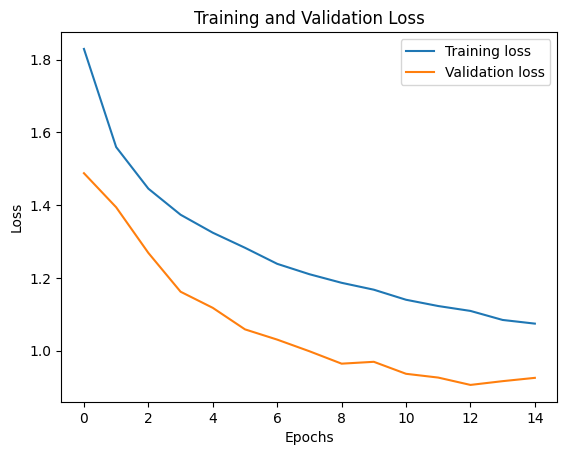

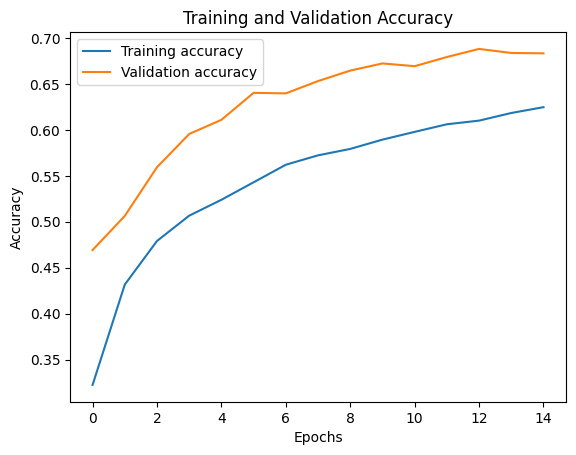

In [15]:
import matplotlib.pyplot as plt

# 損失曲線
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 準確率曲線
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Pytorch版本

In [16]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from torchvision import datasets, transforms
from sklearn.model_selection import train_test_split
from torch.utils.data import Subset

# 設定裝置
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# CIFAR-10數據集載入及預處理
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# 載入數據集
train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

# 切分訓練數據集為訓練和驗證集
train_indices, val_indices = train_test_split(range(len(train_dataset)), test_size=0.1, random_state=42)
train_subset = Subset(train_dataset, train_indices)
val_subset = Subset(train_dataset, val_indices)

# 載入數據加載器
train_loader = DataLoader(train_subset, batch_size=128, shuffle=True)
validation_loader = DataLoader(val_subset, batch_size=128, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)

# 建立模型
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.relu1 = nn.ReLU()
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.relu2 = nn.ReLU()
        self.dropout1 = nn.Dropout(0.5)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(64 * 8 * 8, 64)  # Adjusted for CIFAR-10 dimensions
        self.relu3 = nn.ReLU()
        self.dropout2 = nn.Dropout(0.5)
        self.fc2 = nn.Linear(64, 10)

    def forward(self, x):
        x = self.relu1(self.conv1(x))
        x = self.pool(x)
        x = self.relu2(self.conv2(x))
        x = self.pool(x)
        x = self.dropout1(x)
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu3(x)
        x = self.dropout2(x)
        x = self.fc2(x)
        return x

model = CNN().to(device)

# 損失函數和優化器
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())

# 訓練模型
for epoch in range(15):
    model.train()
    for data, target in train_loader:
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()

    # 驗證模型
    model.eval()
    validation_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in validation_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            validation_loss += criterion(output, target).item()
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()

    validation_loss /= len(validation_loader.dataset)
    validation_accuracy = 100. * correct / len(validation_loader.dataset)
    print(f"Epoch {epoch+1}, Validation Loss: {validation_loss:.4f}, Validation Accuracy: {validation_accuracy:.2f}%")

# 測試模型
test_loss = 0
correct = 0
with torch.no_grad():
    for data, target in test_loader:
        data, target = data.to(device), target.to(device)
        output = model(data)
        test_loss += criterion(output, target).item()
        pred = output.argmax(dim=1, keepdim=True)
        correct += pred.eq(target.view_as(pred)).sum().item()

test_loss /= len(test_loader.dataset)
test_accuracy = 100. * correct / len(test_loader.dataset)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%")


Files already downloaded and verified
Files already downloaded and verified
Epoch 1, Validation Loss: 0.0111, Validation Accuracy: 50.76%
Epoch 2, Validation Loss: 0.0095, Validation Accuracy: 56.48%
Epoch 3, Validation Loss: 0.0088, Validation Accuracy: 61.44%
Epoch 4, Validation Loss: 0.0083, Validation Accuracy: 63.78%
Epoch 5, Validation Loss: 0.0080, Validation Accuracy: 64.62%
Epoch 6, Validation Loss: 0.0077, Validation Accuracy: 66.20%
Epoch 7, Validation Loss: 0.0075, Validation Accuracy: 67.06%
Epoch 8, Validation Loss: 0.0072, Validation Accuracy: 68.16%
Epoch 9, Validation Loss: 0.0073, Validation Accuracy: 68.00%
Epoch 10, Validation Loss: 0.0069, Validation Accuracy: 69.70%
Epoch 11, Validation Loss: 0.0069, Validation Accuracy: 70.24%
Epoch 12, Validation Loss: 0.0068, Validation Accuracy: 70.36%
Epoch 13, Validation Loss: 0.0067, Validation Accuracy: 70.92%
Epoch 14, Validation Loss: 0.0065, Validation Accuracy: 71.72%
Epoch 15, Validation Loss: 0.0065, Validation Accur